In [2]:
Pkg.add("PyPlot")

INFO: Cloning cache of ColorTypes from https://github.com/JuliaGraphics/ColorTypes.jl.git
INFO: Cloning cache of Colors from https://github.com/JuliaGraphics/Colors.jl.git
INFO: Cloning cache of FixedPointNumbers from https://github.com/JuliaMath/FixedPointNumbers.jl.git
INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of MacroTools from https://github.com/MikeInnes/MacroTools.jl.git
INFO: Cloning cache of PyCall from https://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of PyPlot from https://github.com/JuliaPy/PyPlot.jl.git
INFO: Cloning cache of Reexport from https://github.com/simonster/Reexport.jl.git
INFO: Installing ColorTypes v0.5.2
INFO: Installing Colors v0.7.4
INFO: Installing FixedPointNumbers v0.3.9
INFO: Installing LaTeXStrings v0.2.1
INFO: Installing MacroTools v0.3.7
INFO: Installing PyCall v1.14.0
INFO: Installing PyPlot v2.3.2
INFO: Installing Reexport v0.0.3
INFO: Building Conda
INFO: Building PyCall


In [3]:
using PyPlot

INFO: Precompiling module PyPlot.
/usr/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [32]:
function polinomio(init) # Se calculan las raices utilizando el método de Newton.
    list=zeros(Complex64,100);
    x=init;
    for i in 1:100
        f= complex((x^3)-(x^2)-x-1)
        df= complex(3(x^2)-2x-1x) 
        x=x-f/df;
        list[i]=x;
    end
    return list
end;

In [33]:
list1=polinomio(1.1); #Se nombran las listas para las 4 condiciones iniciales.
list2=polinomio(1.5);
list3=polinomio(-1);
list4=polinomio(-1.7);

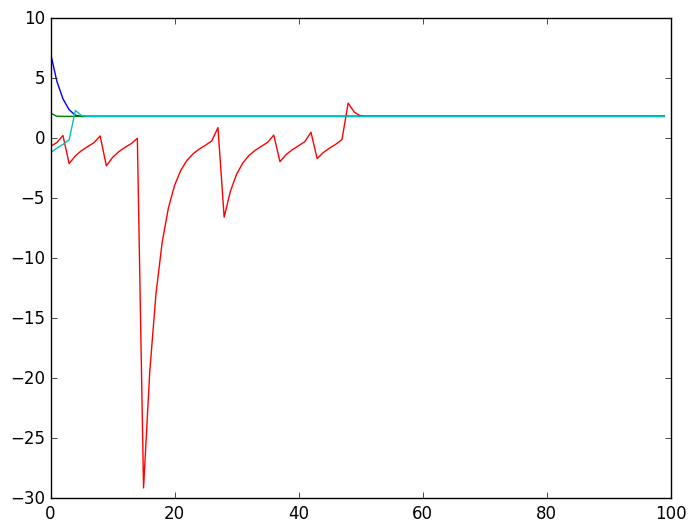

In [34]:
plot(real(list1)) #Se grafica cada lista.
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

In [35]:
function metodo_biseccion(a,b) #Se calculan las raices ahora utilizando el método de bisección.
    listb=zeros(100); #Se nombra la lista de ceros.
    p = (a+b)/2
    f(x) = x^3-x^2-x-1
    for i in 1:100
        if  f(a)*f(p) > 0
            a = p
        listb[i]=p; #Se nombra la lista para este caso el valor inicial de p para cada iteración.
        end
        
        if f(b)*f(p) > 0
            b = p
        listb[i]=p;
        end
        p = (a+b)/2 #Se nombra la lista para este caso el valor inicial de p para cada iteración.
    end
    return listb #Se regresa la lista. 
end;

In [36]:
metodo_biseccion(1,2) #Se presenta la lista para valores iniciales particulares

100-element Array{Float64,1}:
 1.5    
 1.75   
 1.875  
 1.8125 
 1.84375
 1.82813
 1.83594
 1.83984
 1.83789
 1.83887
 1.83936
 1.83911
 1.83923
 ⋮      
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

In [37]:
listb1=metodo_biseccion(1,3) #Se nombra la lista para un intervalo dado.

100-element Array{Float64,1}:
 2.0    
 1.5    
 1.75   
 1.875  
 1.8125 
 1.84375
 1.82813
 1.83594
 1.83984
 1.83789
 1.83887
 1.83936
 1.83911
 ⋮      
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

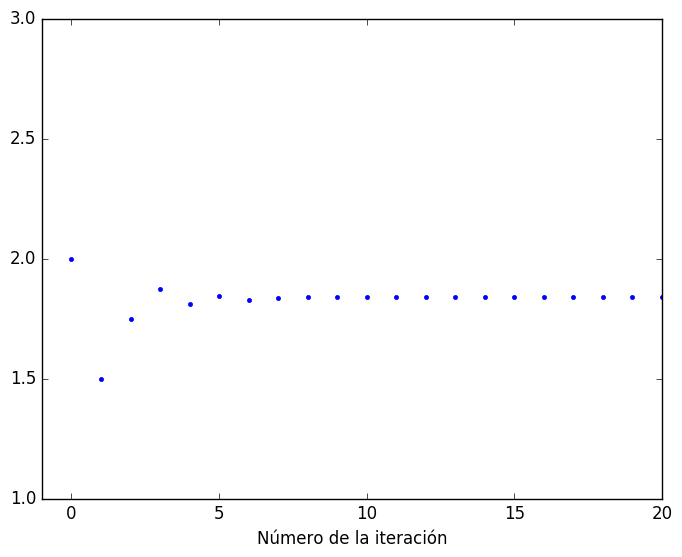

In [38]:
plot(real(listb1),".") #Se grafica la lista creada para un intervalo dado.
xlabel("Número de la iteración")
ylim(1,3)
xlim(-1,20)
show();

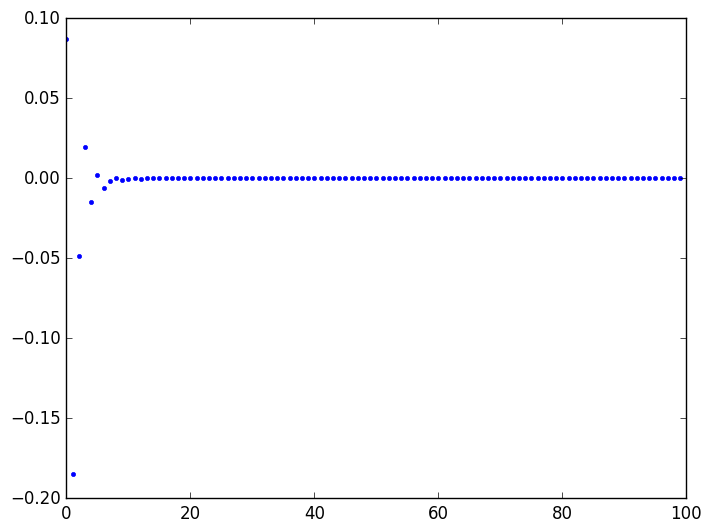

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2bec65aa10>

In [39]:
S=listb1[end] #Se grafica el error relativo a la raiz S del último valor de la listab1.
x=(listb1-S)/S
plot(x,".")

In [41]:
Pkg.add("SymPy")

INFO: Cloning cache of BaseTestNext from https://github.com/JuliaCI/BaseTestNext.jl.git
INFO: Cloning cache of RecipesBase from https://github.com/JuliaPlots/RecipesBase.jl.git
INFO: Cloning cache of SymPy from https://github.com/JuliaPy/SymPy.jl.git
INFO: Installing BaseTestNext v0.2.2
INFO: Installing RecipesBase v0.1.0
INFO: Installing SymPy v0.5.3
INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using /usr/bin/python (Python 2.7.13) at /usr/bin/python, libpython = /usr/lib64/libpython2.7
INFO: /home/est7/.julia/v0.5/PyCall/deps/deps.jl has been updated
INFO: /home/est7/.julia/v0.5/PyCall/deps/PYTHON has not changed
INFO: Package database updated


In [42]:
using SymPy

INFO: Precompiling module SymPy.


In [47]:
x=symbols("x") #Se definen las variables simbólicas

x

In [48]:
function F(f,valorinicial) #Se define una función que tome como entrada una función f y un valor inicial.
    f(valorinicial)
end

F (generic function with 1 method)

In [49]:
function metodo_newton(F,df,valorinicial) #Se define una función que calcule las raíces usando el método de Newton 
    #que tome como entradas a una función cualquiera, la derivada y el valor inicial.
    x=valorinicial
    for i in 1:100
    x=x-F(x)/df(x);
    end
   return x #Se regresa el valor de la raiz.
end

metodo_newton (generic function with 1 method)

In [50]:
metodo_newton(sin,cos,2) #Se realiza un ejemplo.

3.141592653589793

A continuación, se realizan los ejercicios de tal manera que los inputs de la función del método sean solamente una función cualquiera y el valor inicial.

In [53]:
function metodo_newton2(F,xi,error=1e-8) #Se define otra función que calcule las raices usando el método de Newton
    #nuevamente, pero ahora sólo tomando las raices hasta cierto valor denotado por "error".
    x=Sym("x") #Se define localmente a la variable x.
    df=diff(F(x))
    d=error+1
    while error<d
        xi=xi-F(xi)/N(df(xi))
        d=(F(xi)^2)^(1/2)
    end
    return xi #Regresa la raiz.
end

metodo_newton2 (generic function with 2 methods)

In [54]:
metodo_newton2(sin,2) #Se realiza un ejemplo particular.

3.1415926536808043

In [55]:
function Newtonarr(F,xa,xb,error=1e-10) #Se crea una rutina donde en lugar de tomar una sóla condición inicial,
    #reciba un rango de condiciones iniciales.
    raices=[] #Se define el vector raices.
    for i in linspace(xa,xb,200) #Se realiza la iteración 200 veces en el intervalo inicial.
        push!(raices,metodo_newton2(F,i,error)) #Guarda las raices en el vector definido raices.
    end
    return raices #Devuelve el vector.
end

Newtonarr (generic function with 2 methods)

In [56]:
Newtonarr(x^2,1.0,3.0) #Se presenta el vector de las raices para un ejemplo particular.

200-element Array{Any,1}:
 7.62939453125000e-6
 7.70607186322237e-6
 7.78274919519472e-6
 7.85942652716708e-6
 7.93610385913945e-6
 8.01278119111181e-6
 8.08945852308417e-6
 8.16613585505653e-6
 8.24281318702889e-6
 8.31949051900126e-6
 8.39616785097362e-6
 8.47284518294598e-6
 8.54952251491834e-6
                   ⋮
 5.51118323551351e-6
 5.53035256850660e-6
 5.54952190149969e-6
 5.56869123449278e-6
 5.58786056748587e-6
 5.60702990047896e-6
 5.62619923347205e-6
 5.64536856646514e-6
 5.66453789945823e-6
 5.68370723245132e-6
 5.70287656544441e-6
 5.72204589843750e-6